In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import asarray
from numpy import save
import keras
import os
from os import listdir
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

In [ ]:
folder  = '/content/drive/MyDrive/emotion/angry'
folder1 ='/content/drive/MyDrive/emotion/disgust'
folder2 = '/content/drive/MyDrive/emotion/fear'
folder3 = '/content/drive/MyDrive/emotion/happy'
folder4 = '/content/drive/MyDrive/emotion/neutral'
folder5 = '/content/drive/MyDrive/emotion/sad'
folder6 = '/content/drive/MyDrive/emotion/surprise'
folders=[folder,folder1,folder2,folder3,folder4,folder5,folder6]
photos, labels = list(), list()
for i in range (7):
  for file in listdir(folders[i]):
    output=i
    photo = load_img(folders[i]+'/'+file, target_size=(48,48))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/emotion/emotion_photos.npy',photos)
save('/content/drive/MyDrive/emotion/emotion_labels.npy',labels)

(34826, 48, 48, 3) (34826,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=2)
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(48,48,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(7, activation='Softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1,validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
191/191 [==============================] - 15s 23ms/step - loss: 1.8439 - accuracy: 0.2600 - val_loss: 1.7507 - val_accuracy: 0.3021
Epoch 2/100
191/191 [==============================] - 4s 19ms/step - loss: 1.6737 - accuracy: 0.3444 - val_loss: 1.5913 - val_accuracy: 0.3857
Epoch 3/100
191/191 [==============================] - 4s 19ms/step - loss: 1.5295 - accuracy: 0.4138 - val_loss: 1.4717 - val_accuracy: 0.4414
Epoch 4/100
191/191 [==============================] - 4s 19ms/step - loss: 1.4351 - accuracy: 0.4539 - val_loss: 1.4466 - val_accuracy: 0.4525
Epoch 5/100
191/191 [==============================] - 4s 19ms/step - loss: 1.3386 - accuracy: 0.4961 - val_loss: 1.3594 - val_accuracy: 0.4809
Epoch 6/100
191/191 [==============================] - 5s 25ms/step - loss: 1.2672 - accuracy: 0.5239 - val_loss: 1.4239 - val_accuracy: 0.4576
Epoch 7/100
191/191 [==============================] - 4s 21ms/step - loss: 1.1828 - accuracy: 0.5570 - val_loss: 1.2622 - val_accuracy

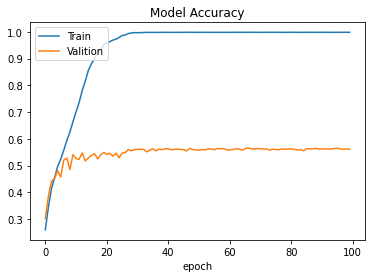

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Valition'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/emotion/emotion_model.h5')